# **Trabajo práctico CaC - Parte 2**

**Grupo 097**
*   Rodolfo Albornoz

**Comisión 24003**

Importamos las librerias correspondientes y usamos la URL del google sheets con los archivos para utilizarlos en el collab

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Para redondear los flotantes a 2 decimales
pd.options.display.float_format = "{:.2f}".format

ID_planilla = "1IkytFzvzkWp9d5rSR6K8F-eWK4ddjasX3JKzRGzoGUw"

URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='

# Ventas

Levantamos el dataframe de ventas

In [ ]:
df_ventas = pd.read_csv(URL + "ventas_Paraguay", thousands = '.')

## Exploración de los datos

Empezamos explorando los datos

In [ ]:
df_ventas.shape

(45, 13)

In [ ]:
df_ventas.dtypes

distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

Observaciones:
*   Tenemos que convertir los valores de la columna distributor de float a int (Que son valores enteros)
*   Tenemos que convertir los object a float (Ya que representan precios con decimales)



Exploramos las primeras y últimas filas del dataframe

In [ ]:
df_ventas.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,29.00,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,161.00,NaN,"$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,175.00,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,234.00,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,241.00,"$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


In [ ]:
df_ventas.tail()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
40,1666.00,"$3.221.765,13","$10.536.882,23","$35.563.624,11","$46.039.695,30","$22.300.838,58","$0,00","$51.579.748,25","$59.199.680,31","$12.466.621,84","$80,31","$36.999.867,09","$112.927.599,01"
41,1679.00,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,1710.00,"$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,1723.00,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


Observaciones:
*   Tenemos que sacar los $ y . de todas las columnas con valores de tipo precio, y cambiar los "," por "." (Para convertir las columnas a float)
*   Tenemos que sacar la última fila de los datos (Que en la hoja de sheets representa el total)
*   La columna de "Brick" tiene muchos valores de 0, y la de "Steel" también tiene varios valores en 0. Mas tarde vamos a investigar y apoyarnos con las demás hojas de cálculo para descubrir por qué podría ser esto.

Revisemos los valores null

In [ ]:
nulos_por_filas_ventas = df_ventas[df_ventas.isnull().any(axis=1)]
nulos_por_filas_ventas

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
1,161.00,NaN,"$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


In [ ]:
nulos_por_columnas_ventas = df_ventas.isnull().any()
nulos_por_columnas_ventas

distributor     True
Rubber          True
Brass          False
Vinyl          False
Granite        False
Stone          False
Brick          False
Aluminum       False
Glass          False
Plexiglass     False
Steel          False
Wood           False
Plastic        False
dtype: bool

La fila 44 es la última, la de totales, y dijimos que vamos a eliminarla. Respecto a la primera que tiene valor nulo en la columna "Rubber", no vamos a sacar la fila porque podria darnos información importante, pero podemos llenar su valor nulo con cualquier valor (Por ejemplo 0)

Por último, solo por curiosidad, veamos si hay valores duplicados. Si no los hay no nos preocupamos

In [ ]:
df_ventas.duplicated().sum()

0

## Limpieza de datos

**1. Eliminar símbolos de $ y . y reemplazar , por .**

In [ ]:
columnas_ventas = list(df_ventas.columns[1:13])

In [ ]:
for col in columnas_ventas:
  df_ventas[col] = df_ventas[col].str.replace('$','')
  df_ventas[col] = df_ventas[col].str.replace('.', '')
  df_ventas[col] = df_ventas[col].str.replace(',', '.')

df_ventas.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,29.00,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.00,55872547.77,18050385.12,178927599.01,2788.80,54510203.61,20982.80
1,161.00,NaN,25837100.49,36603264.50,21883374.92,1473437.08,0.00,46239695.30,33102840.61,35563624.11,599.01,9945371.16,187306.41
2,175.00,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.00,21883374.92,78927599.01,1346769.34,0.00,36603264.50,300838.58
3,234.00,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.00,79358855.35,32067534.68,53172624.14,2922.94,33102840.61,579748.25
4,241.00,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.00,53172624.14,57187306.41,1155872547.77,203.61,43512922.94,730734.07


**2. Eliminar última fila**

In [ ]:
df_ventas.drop(df_ventas.index[-1], inplace = True)

**3. Llenar valores nulos**

In [ ]:
df_ventas['Rubber'].fillna(0, inplace = True)

**4. Convertir filas a otros tipos de datos**

In [ ]:
# Para la columna distributor solo casteo a int para eliminar decimales
df_ventas['distributor'] = df_ventas['distributor'].astype(int)

for col in columnas_ventas:
  df_ventas[col] = df_ventas[col].astype(float)

df_ventas.dtypes

distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

Dataframe de ventas final

In [ ]:
df_ventas

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,29,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.00,55872547.77,18050385.12,178927599.01,2788.80,54510203.61,20982.80
1,161,0.00,25837100.49,36603264.50,21883374.92,1473437.08,0.00,46239695.30,33102840.61,35563624.11,599.01,9945371.16,187306.41
2,175,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.00,21883374.92,78927599.01,1346769.34,0.00,36603264.50,300838.58
3,234,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.00,79358855.35,32067534.68,53172624.14,2922.94,33102840.61,579748.25
4,241,11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.00,53172624.14,57187306.41,1155872547.77,203.61,43512922.94,730734.07
5,308,90185311.22,43512922.94,11758005.07,76443998.86,36999867.09,23012.00,51673437.08,61236075.66,165978582.24,840.61,27179878.86,780180.58
6,325,78927599.01,57187306.41,41899590.44,18050385.12,20344007.84,0.00,35563624.11,90185311.22,121883374.92,855.35,11758005.07,883374.92
7,364,5662736.92,59862809.01,46239695.30,90185311.22,36603264.50,0.00,81812951.32,57009912.25,42411396.23,6.86,35563624.11,899590.44
8,378,57009912.25,53172624.14,36999867.09,59199680.31,78927599.01,12548.00,42411396.23,55872547.77,25837100.49,82.23,22300838.58,1346769.34
9,379,32438788.20,54510203.61,1346769.34,18421797.13,10536882.23,0.00,21780180.58,11758005.07,11758005.07,7306.41,76443998.86,1473437.08


# Importaciones

Levantamos el dataframe de importaciones

In [ ]:
df_importaciones = pd.read_csv(URL + "importaciones_Paraguay",  thousands = '.')

## Exploración de los datos

Empezamos explorando los datos

In [ ]:
df_importaciones.shape

(46, 16)

In [ ]:
df_importaciones.dtypes

distributor      int64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object

Observaciones:
*   Tenemos que convertir los object a float (Ya que representan precios con decimales)



Exploramos las primeras y últimas filas del dataframe

In [ ]:
df_importaciones.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1017,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1055,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1062,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,1093,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,1104,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


In [ ]:
df_importaciones.tail()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
41,815,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00",NaN,NaN,NaN
42,818,"$41.761.417,00","$33.709.306,00","$27.497.587,00","$28.311.310,00","$21.683.294,00","$26.276.785,00","$32.530.973,00","$21.500.385,00","$23.197.054,00","$43.835.851,00","$29.355.739,00","$43.689.411,00",NaN,NaN,NaN
43,846,"$20.880.116,00","$37.111.825,00","$34.422.161,00","$40.759.561,00","$26.050.968,00","$21.080.855,00","$21.443.932,00","$22.394.142,00","$23.084.319,00","$26.861.046,00","$23.181.358,00","$22.709.805,00",NaN,NaN,NaN
44,860,"$34.050.845,00","$30.151.961,00","$26.956.027,00","$45.003.866,00","$23.879.569,00","$27.287.921,00","$44.733.537,00","$21.113.491,00","$22.884.480,00","$26.530.501,00","$40.810.028,00","$27.286.530,00",NaN,NaN,NaN
45,920,"$35.580.430,00","$39.978.595,00","$32.046.855,00","$30.147.636,00","$36.212.747,00","$33.365.715,00","$35.482.192,00","$26.604.405,00","$21.395.275,00","$31.214.082,00","$32.655.598,00","$20.684.792,00",NaN,NaN,NaN


Observaciones:
*   Tenemos que sacar los $ y . de todos los precios y reemplazar los "," por "." (Para convertir las columnas a float)
*   Tenemos que sacar las últimas 3 columnas que tienen todos valores nulos
*   Una vez convertidas las columnas de tipo object a float, se deben convertir a entero, ya que los precios son flotantes con parte decimal 0

Revisemos los valores null

In [ ]:
nulos_por_filas_importaciones = df_importaciones[df_importaciones.isnull().any(axis=1)]
nulos_por_filas_importaciones

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1017,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1055,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1062,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,1093,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,1104,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN
5,1169,"$43.909.858,00","$27.128.183,00","$36.391.549,00","$21.542.467,00","$34.971.118,00","$24.495.086,00","$37.708.256,00","$26.877.104,00","$43.552.441,00","$43.933.774,00","$33.932.246,00","$25.891.558,00",NaN,NaN,NaN
6,1169,"$28.550.182,00","$36.499.732,00","$41.512.708,00","$22.262.065,00","$30.270.432,00","$34.506.212,00","$29.217.327,00","$36.706.402,00","$42.933.183,00","$37.610.210,00","$43.345.217,00","$38.564.095,00",NaN,NaN,NaN
7,1183,"$21.771.886,00","$43.109.659,00","$23.247.953,00","$22.866.072,00","$31.459.461,00","$30.652.665,00","$42.058.181,00","$41.910.985,00","$42.259.050,00","$34.391.207,00","$23.556.203,00","$26.611.825,00",NaN,NaN,NaN
8,1235,"$36.667.511,00","$25.366.105,00","$24.902.331,00","$36.605.735,00","$44.673.772,00","$31.541.390,00","$36.511.291,00","$23.484.274,00","$41.220.715,00","$28.142.369,00","$21.970.464,00","$44.234.252,00",NaN,NaN,NaN
9,1302,"$39.958.024,00","$40.169.347,00","$35.399.555,00","$25.461.219,00","$37.801.759,00","$30.154.265,00","$42.855.837,00","$31.635.653,00","$41.009.467,00","$12.242.337.842,00","$43.253.537,00","$23.863.490,00",NaN,NaN,NaN


In [ ]:
nulos_por_columnas_importaciones = df_importaciones.isnull().any()
nulos_por_columnas_importaciones

distributor    False
Rubber         False
Brass          False
Vinyl          False
Granite        False
Stone          False
Brick          False
Aluminum       False
Glass          False
Plexiglass     False
Steel          False
Wood           False
Plastic        False
Unnamed: 13     True
Unnamed: 14     True
Columnas        True
dtype: bool

Confirmamos que todos los valores nulos están en las últimas 3 columnas

Por último, solo por curiosidad, veamos si hay valores duplicados. Si no los hay no nos preocupamos

In [ ]:
df_importaciones.duplicated().sum()

0

## Limpieza de datos

**1. Eliminar símbolos de $ y . y reemplazar , por .**

In [ ]:
columnas_importaciones = list(df_importaciones.columns[1:13])

In [ ]:
for col in columnas_importaciones:
  df_importaciones[col] = df_importaciones[col].astype(str).str.replace('$','')
  df_importaciones[col] = df_importaciones[col].astype(str).str.replace('.', '')
  df_importaciones[col] = df_importaciones[col].astype(str).str.replace(',', '.')

df_importaciones.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1017,22431099.00,36031577.00,31118167.00,21322223.00,35382848.00,35280292.00,32362235.00,36836190.00,9440858902.00,34676425.00,31862742.00,32588556.00,NaN,Filas,Valores
1,1055,27566922.00,21996538.00,39412316.00,25681987.00,41861783.00,22408742.00,40690302.00,37958885.00,8726744768.00,26472020.00,27403955.00,37881851.00,NaN,NaN,NaN
2,1062,37577095.00,41457655.00,31467967.00,37577926.00,35845106.00,42953168.00,33817289.00,41602183.00,1223232055.00,30599951.00,40514747.00,38569219.00,NaN,NaN,NaN
3,1093,36012730.00,41667692.00,22837073.00,29288200.00,39553494.00,33513588.00,36827718.00,29669764.00,44858747.00,26820925.00,20797348.00,21064408.00,NaN,NaN,NaN
4,1104,43416417.00,36290780.00,23679738.00,21183706.00,25210622.00,30864041.00,41173207.00,36719169.00,43893114.00,22575455.00,21351499.00,24607204.00,NaN,NaN,NaN


**2. Eliminar últimas 3 columnas**

In [ ]:
df_importaciones.drop(columns = df_importaciones.columns[-3:], inplace = True)

**3. Convertir filas a otros tipos de datos**

In [ ]:
for col in columnas_importaciones:
  # Convierto primero a float ya que si no, no me deja pasar a int, porque son strings
  df_importaciones[col] = df_importaciones[col].astype(float).astype(int)   # DOBLE CONVERSIÓN A INT?

df_importaciones.dtypes

distributor    int64
Rubber         int64
Brass          int64
Vinyl          int64
Granite        int64
Stone          int64
Brick          int64
Aluminum       int64
Glass          int64
Plexiglass     int64
Steel          int64
Wood           int64
Plastic        int64
dtype: object

Dataframe de importaciones final

In [ ]:
df_importaciones

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1017,22431099,36031577,31118167,21322223,35382848,35280292,32362235,36836190,9440858902,34676425,31862742,32588556
1,1055,27566922,21996538,39412316,25681987,41861783,22408742,40690302,37958885,8726744768,26472020,27403955,37881851
2,1062,37577095,41457655,31467967,37577926,35845106,42953168,33817289,41602183,1223232055,30599951,40514747,38569219
3,1093,36012730,41667692,22837073,29288200,39553494,33513588,36827718,29669764,44858747,26820925,20797348,21064408
4,1104,43416417,36290780,23679738,21183706,25210622,30864041,41173207,36719169,43893114,22575455,21351499,24607204
5,1169,43909858,27128183,36391549,21542467,34971118,24495086,37708256,26877104,43552441,43933774,33932246,25891558
6,1169,28550182,36499732,41512708,22262065,30270432,34506212,29217327,36706402,42933183,37610210,43345217,38564095
7,1183,21771886,43109659,23247953,22866072,31459461,30652665,42058181,41910985,42259050,34391207,23556203,26611825
8,1235,36667511,25366105,24902331,36605735,44673772,31541390,36511291,23484274,41220715,28142369,21970464,44234252
9,1302,39958024,40169347,35399555,25461219,37801759,30154265,42855837,31635653,41009467,12242337842,43253537,23863490


# Análisis de los datos

Obtengamos algunos valores de interés para el dataframe de ventas e importaciones

In [ ]:
medidas_ventas = {
    'Media': df_ventas.mean(),
    'Mediana': df_ventas.median(),
    'Maximo': df_ventas.max(),
    'Minimo': df_ventas.min(),
    'Desviacion Estandar': df_ventas.std(),
    'Suma de ventas': df_ventas.sum()
}

df_medidas_ventas = pd.DataFrame(medidas_ventas)
df_medidas_ventas

,Media,Mediana,Maximo,Minimo,Desviacion Estandar,Suma de ventas
distributor,933.34,890.00,1723.00,29.00,500.12,41067.00
Rubber,37360242.65,36281745.60,90185311.22,0.00,23575592.67,1643850676.79
Brass,41833167.75,39286327.95,177874267.01,1346769.34,30637106.50,1840659380.95
Vinyl,43467934.56,41736189.62,177874267.01,1346769.34,30812148.98,1912589120.56
Granite,41938512.51,39088026.65,177874267.01,1346769.34,30316025.99,1845294550.27
Stone,37534531.72,36801565.80,90185311.22,1346769.34,22046995.00,1651519395.63
Brick,3469.50,0.00,42458.00,0.00,9185.90,152658.00
Aluminum,49178012.97,42962159.58,177874267.01,6706393.21,33115375.06,2163832570.85
Glass,49392633.70,42962159.58,177874267.01,1586769.34,37333892.57,2173275882.75
Plexiglass,590319106.11,136731561.59,5441399590.44,1346769.34,957632863.33,25974040668.70


In [ ]:
medidas_importaciones = {
    'Media': df_importaciones.mean(),
    'Mediana': df_importaciones.median(),
    'Maximo': df_importaciones.max(),
    'Minimo': df_importaciones.min(),
    'Desviacion Estandar': df_importaciones.std(),
    'Suma de importaciones': df_importaciones.sum()
}

df_medidas_importaciones = pd.DataFrame(medidas_importaciones)
df_medidas_importaciones

,Media,Mediana,Maximo,Minimo,Desviacion Estandar,Suma de importaciones
distributor,925.24,890.00,1723,29,498.40,42561
Rubber,33225236.07,34446810.00,44229593,20607246,7267904.19,1528360859
Brass,31783336.70,29940461.50,44568676,20737841,7770710.72,1462033488
Vinyl,31960348.93,32100782.00,42055834,20935764,5788841.17,1470176051
Granite,30047227.07,28225487.00,45198396,20871609,7848823.72,1382172445
Stone,33845945.67,32716010.00,45128426,21683294,7334839.60,1556913501
Brick,117615388.15,34423280.50,1643078851,20840169,295829071.51,5410307855
Aluminum,34478925.96,34086807.50,44733537,21443932,6458598.84,1586030594
Glass,32455944.57,31690785.00,44676489,21113491,6715936.36,1492973450
Plexiglass,453398023.54,35446610.00,9440858902,21395275,1870101786.45,20856309083


De acá sacamos varios puntos:
*   Los productos Brick y Steel son los que menores ventas dieron
*   Hay ventas con valor 0 en rubber, brick y steel
*   El valor de las importaciones para brick, steel y plexiglass son muy altos, contrastando con estos valores para las ventas



# Modelado de datos

Vamos a crear un dataframe con la suma de las ventas y importaciones para cada producto, y el ratio entre las ventas y las importaciones


In [ ]:
# Aprovecho los dataframes con las medidas para ventas e importaciones y tomo la
# suma para cada producto de cada dataframe
df_suma_ventas = pd.DataFrame(df_medidas_ventas['Suma de ventas'])
df_suma_importaciones = pd.DataFrame(df_medidas_importaciones['Suma de importaciones'])

In [ ]:
# Hago el merge
df_totales = pd.merge(df_suma_ventas, df_suma_importaciones, left_index = True, right_index = True)
df_totales

,Suma de ventas,Suma de importaciones
distributor,41067.00,42561
Rubber,1643850676.79,1528360859
Brass,1840659380.95,1462033488
Vinyl,1912589120.56,1470176051
Granite,1845294550.27,1382172445
Stone,1651519395.63,1556913501
Brick,152658.00,5410307855
Aluminum,2163832570.85,1586030594
Glass,2173275882.75,1492973450
Plexiglass,25974040668.70,20856309083


In [ ]:
# Para convertir a millones
df_totales['Suma de ventas'] = df_totales['Suma de ventas'] / 1000000
df_totales['Suma de importaciones'] = df_totales['Suma de importaciones']  / 1000000

df_totales['Ratio ventas/importaciones'] = (df_totales['Suma de ventas'] / df_totales['Suma de importaciones'])

# Elimino la fila que tiene los distributor y no nos interesa
df_totales = df_totales.drop(index = 'distributor')

df_totales.rename(columns = {
    'Suma de ventas': 'Suma de ventas (En millones)',
    'Suma de importaciones': 'Suma de importaciones (En millones)'
}, inplace = True)

df_totales

,Suma de ventas (En millones),Suma de importaciones (En millones),Ratio ventas/importaciones
Rubber,1643.85,1528.36,1.08
Brass,1840.66,1462.03,1.26
Vinyl,1912.59,1470.18,1.30
Granite,1845.29,1382.17,1.34
Stone,1651.52,1556.91,1.06
Brick,0.15,5410.31,0.00
Aluminum,2163.83,1586.03,1.36
Glass,2173.28,1492.97,1.46
Plexiglass,25974.04,20856.31,1.25
Steel,0.06,13724.87,0.00


Con esto confirmamos lo que hicimos en el análisis, que las ventas eran mucho menores que las importaciones para los productos "Brick" y "Steel"

# Visualización

Ahora veamos gráficamente la pequeña cantidad de ventas que hay para los productos "Brick" y "Steel", comparando las ventas e importaciones de forma grafica

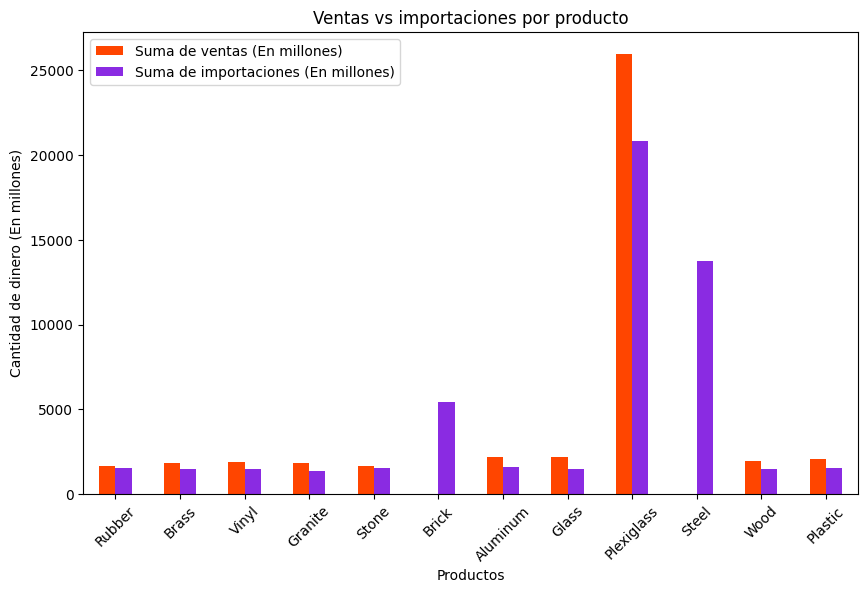

In [ ]:
ax = df_totales[['Suma de ventas (En millones)', 'Suma de importaciones (En millones)']].plot(kind = 'bar', figsize = (10, 6), color = ['#FF4500', '#8A2BE2'],)

ax.set_title('Ventas vs importaciones por producto')
ax.set_xlabel('Productos')
ax.set_ylabel('Cantidad de dinero (En millones)')
plt.xticks(rotation = 0)
plt.xticks(rotation = 45)

plt.show()

Y confirmamos, graficamente, que los productos "Brick" y "Steel" no aportan de forma positiva a las ventas

# Conclusiones finales

Ya sabemos que el problema fue en las ventas de los productos "Brick" y "Steel", viendolo al comparar el precio en los datos de ventas e importaciones

Cuando miramos la hoja "distributors_profiles", luego de eliminar la columna "Years in the construction market" (Que no sirve para nada) y filtrar por id no nulos, vemos que casi todas las actividades de los distribuidores están relacionadas con la importacion/distribucion de materiales de construcción, y algunos otros producen cierto material en particular

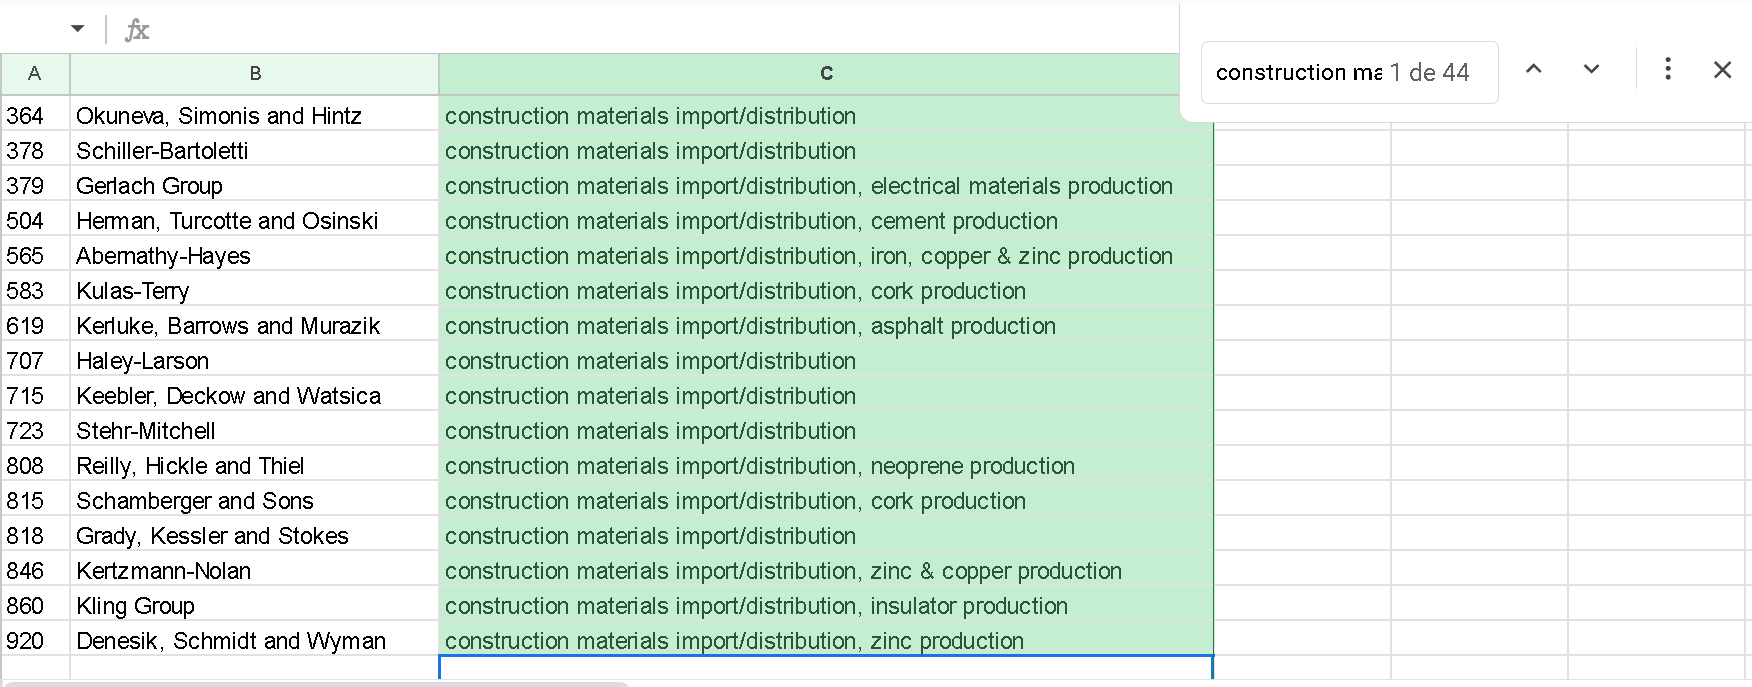

Cuando miramos la hoja "location_profiles", luego de filtrar por ids no nulos ni 0 (Mostrando las ciudades en donde existe un distribuidor de la compañia) vemos que hay muy pocas ciudades cuyas actividades están relacionadas con los productos "Brick" y "Steel"

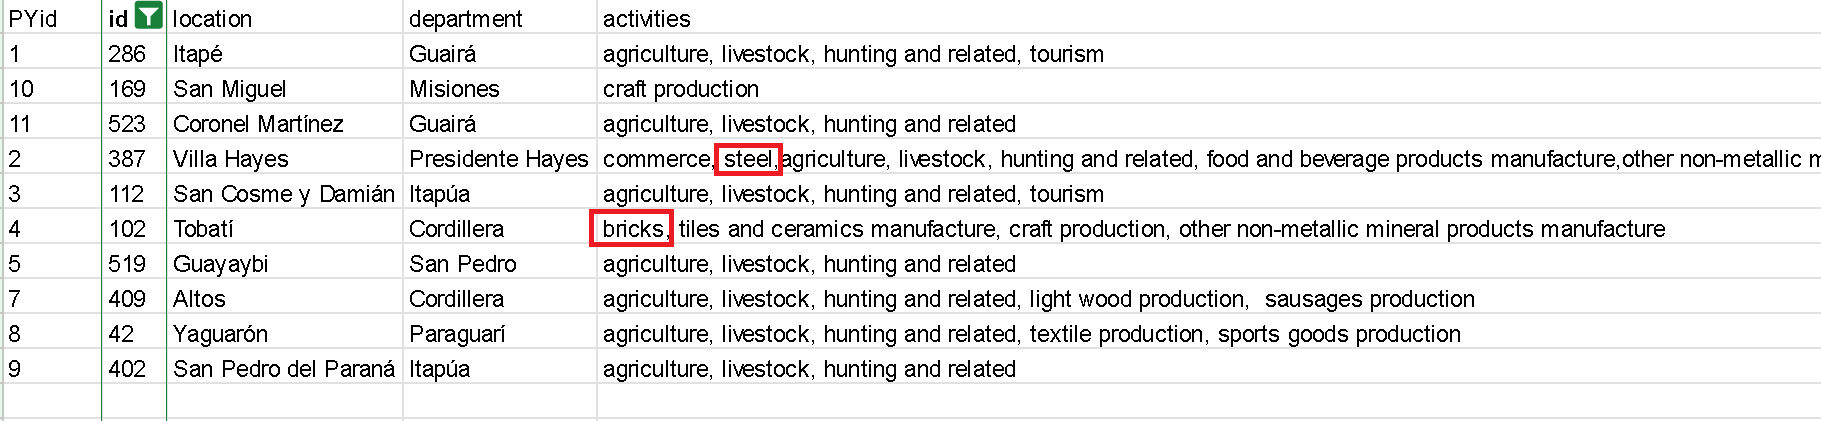

Por lo tanto, podemos concluir que el fallo de la estrategia fue en querer vender los productos "Brick" y "Steel" en lugares donde no hay actividades donde se necesite el uso de estos productos, y por lo tanto es imposible venderlos